In [1]:
import numpy as np
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog

import PIL
import cv2
import pickle

downloading Kaggle dataset (Cars)

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d prondeau/the-car-connection-picture-dataset

Dataset URL: https://www.kaggle.com/datasets/prondeau/the-car-connection-picture-dataset
License(s): copyright-authors
100% 681M/682M [00:06<00:00, 65.6MB/s]
100% 682M/682M [00:06<00:00, 118MB/s] 


In [4]:
!unzip /content/the-car-connection-picture-dataset.zip -d /content/car

Streaming output truncated to the last 5000 lines.
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_Fel.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_GON.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_JXa.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_LNH.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_LhY.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_LlQ.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_MOs.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_MTX.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV_MxF.jpg  
  inflating: /content/car/Toyota_Sequoia_2019_60_20_380_57_8_79_77_205_13_4WD_8_4_SUV

In [5]:
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
 99% 340M/342M [00:02<00:00, 178MB/s]
100% 342M/342M [00:02<00:00, 132MB/s]


In [6]:
!unzip /content/natural-images.zip -d /content/natural

Streaming output truncated to the last 5000 lines.
  inflating: /content/natural/natural_images/cat/cat_0204.jpg  
  inflating: /content/natural/natural_images/cat/cat_0205.jpg  
  inflating: /content/natural/natural_images/cat/cat_0206.jpg  
  inflating: /content/natural/natural_images/cat/cat_0207.jpg  
  inflating: /content/natural/natural_images/cat/cat_0208.jpg  
  inflating: /content/natural/natural_images/cat/cat_0209.jpg  
  inflating: /content/natural/natural_images/cat/cat_0210.jpg  
  inflating: /content/natural/natural_images/cat/cat_0211.jpg  
  inflating: /content/natural/natural_images/cat/cat_0212.jpg  
  inflating: /content/natural/natural_images/cat/cat_0213.jpg  
  inflating: /content/natural/natural_images/cat/cat_0214.jpg  
  inflating: /content/natural/natural_images/cat/cat_0215.jpg  
  inflating: /content/natural/natural_images/cat/cat_0216.jpg  
  inflating: /content/natural/natural_images/cat/cat_0217.jpg  
  inflating: /content/natural/natural_images/cat/cat_

In [9]:
car_path = glob("/content/car/*")
car_path[:5]

['/content/car/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_xSs.jpg',
 '/content/car/Mitsubishi_Outlander Sport_2013_20_18_140_20_4_69_64_169_25_FWD_5_4_SUV_RGY.jpg',
 '/content/car/INFINITI_QX60_2014_43_18_260_35_6_77_68_196_19_AWD_7_4_SUV_zBm.jpg',
 '/content/car/Nissan_GT-R_2017_174_20_600_38_6_74_53_184_16_AWD_4_2_2dr_TYC.jpg',
 '/content/car/Ford_Flex_2013_41_19_280_35_6_75_68_201_16_AWD_7_4_4dr_nry.jpg']

In [10]:
natural_path = glob("/content/natural/natural_images/car/*")
natural_path[:5]

['/content/natural/natural_images/car/car_0371.jpg',
 '/content/natural/natural_images/car/car_0217.jpg',
 '/content/natural/natural_images/car/car_0565.jpg',
 '/content/natural/natural_images/car/car_0880.jpg',
 '/content/natural/natural_images/car/car_0807.jpg']

Reading image features using traditional HOG (Histogram Oriented Gradients) filter.

<ipython-input-12-98da966c4716>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, visualise = hog(example, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)


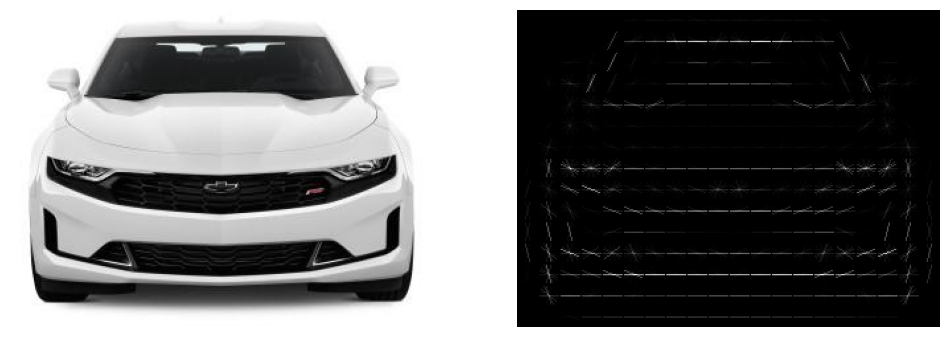

In [12]:
example = np.asarray(PIL.Image.open(car_path[0]))

features, visualise = hog(example, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True, multichannel=True)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(example)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(visualise,cmap="gray")
plt.axis("off")
plt.show()

In [13]:
features.shape

(9576,)

In [19]:
positive_image = []
negative_image = []
positive_labels = np.ones(len(car_path))
negative_labels = np.zeros(len(natural_path))

for cpath in car_path:
  img = np.asarray(PIL.Image.open(cpath))
  img = cv2.cvtColor(cv2.resize(img, (96, 64)), cv2.COLOR_RGB2GRAY)
  img = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2))
  positive_image.append(img)

for npath in natural_path:
  img = np.asarray(PIL.Image.open(npath))
  img = cv2.cvtColor(cv2.resize(img, (96, 64)), cv2.COLOR_RGB2GRAY)
  img = hog(img, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2))
  negative_image.append(img)

x = np.asarray(positive_image + negative_image)
y = np.asarray(list(positive_labels) + list(negative_labels))

print("Shape of image set",x.shape)
print("Shape of labels",y.shape)


Shape of image set (65435, 540)
Shape of labels (65435,)


In [20]:
print(f"Length of x: {len(x)}")
print(f"Length of y: {len(y)}")

Length of x: 65435
Length of y: 65435


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(52348, 540)
(13087, 540)
(52348,)
(13087,)


In [22]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=y_test)*100)

Accuracy score of model is  99.80897073431649


In [27]:
import cv2
import numpy as np
from skimage.feature import hog

def slidingwindow(image, window_size=(96, 64), channel='RGB', step=12):
    if channel == 'RGB':
        img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    elif channel == 'BGR':
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif channel.lower() not in ["grayscale", "gray"]:
        raise Exception("Invalid channel type")

    coords = []
    features = []

    hIm, wIm = img.shape[:2]

    for h1 in range(0, hIm - window_size[1], step):
        for w1 in range(0, wIm - window_size[0], step):
            h2 = h1 + window_size[1]
            w2 = w1 + window_size[0]
            window = img[h1:h2, w1:w2]
            feature_of_window = hog(window, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2))
            coords.append((w1, w2, h1, h2))
            features.append(feature_of_window)

    return (coords, np.asarray(features))


In [28]:
example_img = np.asarray(PIL.Image.open("/content/car/Chevrolet_Camaro_2019_31_18_270_20_4_74_52_188_20_RWD_4_2_Convertible_xSs.jpg"))
coords,features = slidingwindow(example_img,channel="RGB")

coords[:5]

[(0, 96, 0, 64),
 (12, 108, 0, 64),
 (24, 120, 0, 64),
 (36, 132, 0, 64),
 (48, 144, 0, 64)]

In [29]:
features.shape

(285, 540)

In [48]:
from sklearn.preprocessing import MinMaxScaler

class Heatmap:
    def __init__(self, original_image):
        self.mask = np.zeros(original_image.shape[:2])

    def incValOfReg(self, coords):
        w1, w2, h1, h2 = coords
        self.mask[h1:h2, w1:w2] = self.mask[h1:h2, w1:w2] + 30

    def decValOfReg(self, coords):
        w1, w2, h1, h2 = coords
        self.mask[h1:h2, w1:w2] = self.mask[h1:h2, w1:w2] - 30

    def compileHeatmap(self):
        scaler = MinMaxScaler()
        self.mask = scaler.fit_transform(self.mask)

        self.mask = np.asarray(self.mask * 255, dtype=np.uint8)
        self.mask = cv2.inRange(self.mask, 170, 255)
        return self.mask

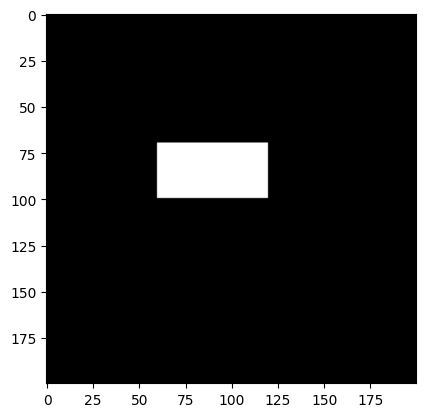

In [49]:
example_mask = np.zeros((200, 200))
example_mask[70:100, 60:120] = 255
plt.imshow(example_mask, cmap='gray')
plt.show()

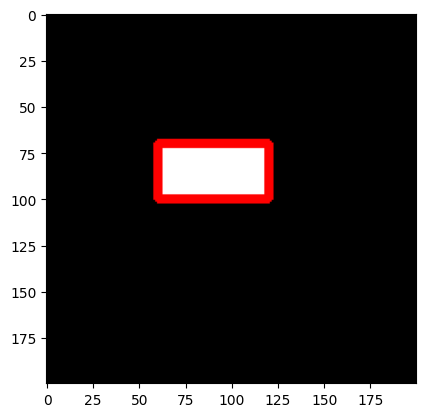

In [50]:
contours, hierarchy = cv2.findContours(example_mask.astype(np.uint8), 1, 2)[-2:]

for c in contours:
  if cv2.contourArea(c) < 10 * 10:
    continue
  (x, y, w, h) = cv2.boundingRect(c)
  rgb_ver = cv2.cvtColor(example_mask.astype(np.uint8), cv2.COLOR_GRAY2RGB)
  im = cv2.rectangle(rgb_ver, (x, y), (x+w, y+h), (255, 0, 0), 3)
plt.imshow(im)

In [51]:
def detect(image):

    # Extracting features and initalizing heatmap
    coords,features = slidingwindow(image)
    htmp = Heatmap(image)


    for i in range(len(features)):
        # If region is positive then add some heat
        decision = svc.predict([features[i]])
        if decision[0] == 1:
            htmp.incValOfReg(coords[i])
            # Else remove some heat
        else:
            htmp.decValOfReg(coords[i])

    # Compiling heatmap
    mask = htmp.compileHeatmap()

    cont,_ = cv2.findContours(mask,1,2)[:2]
    for c in cont:
        # If a contour is small don't consider it
        if cv2.contourArea(c) < 70 * 70:
          continue
        (x, y, w, h) = cv2.boundingRect(c)
        image = cv2.rectangle(image,(x,y),(x+w,y+h),(255),2)

    return image

In [52]:
import requests
import io

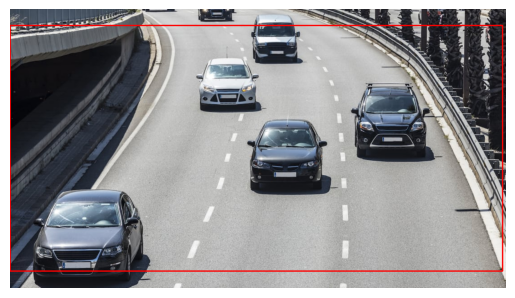

In [53]:
byte_img = requests.get("https://images2.minutemediacdn.com/image/upload/c_crop,h_843,w_1500,x_0,y_69/f_auto,q_auto,w_1100/v1554995310/shape/mentalfloss/istock-472964014.jpg").content
byte_img = io.BytesIO(byte_img)

img = np.asarray(PIL.Image.open(byte_img))

detected = detect(img)
plt.imshow(detected)
plt.axis("off")
plt.show()